In [28]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks

[*********************100%%**********************]  1 of 1 completed


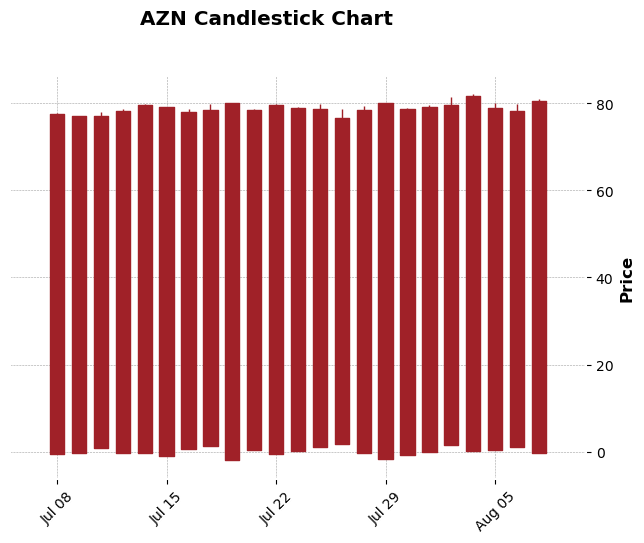

In [131]:

# Download recent data
recent_data = yf.download("AZN", period="1mo", interval="1d")

# Drop unnecessary columns
recent_data = recent_data.drop(columns=["Adj Close"])
recent_data.Close = recent_data.Close - recent_data.Open
# Create a candlestick chart
mpf.plot(
    recent_data,
    type="candle",
    style="charles",
    title="AZN Candlestick Chart",
    ylabel="Price",
)

# Show the plot
mpf.show()

In [148]:

X = recent_data.drop(columns=["Close","Volume"])
y = recent_data.drop(columns=["High","Low","Open","Volume"])
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
input_shape = [3]


early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=40, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([
    layers.Dense(128, activation='relu',input_shape = input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])


optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(

    optimizer=optimizer,
    loss="mse",
)
EPOCHS = 1000
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=64,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
    
)



c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
checl_data =  yf.download("AZN",period= "1d") 
checl_data = checl_data.drop(columns=["Adj Close"])
check_X = checl_data.drop(columns=["Close","Volume"])
#print(checl_data.head())
print(check_X)
print(model.predict(check_X))

[*********************100%%**********************]  1 of 1 completed

             Open       High        Low
Date                                   
2024-08-07  80.57  80.985001  80.199997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.2733469]]


In [118]:
print(X)

                 Open       High        Low
Date                                       
2024-07-08  77.610001  77.660004  77.040001
2024-07-09  76.959999  76.970001  76.300003
2024-07-10  76.970001  77.849998  76.949997
2024-07-11  78.150002  78.589996  77.860001
2024-07-12  79.519997  79.790001  79.180000
2024-07-15  79.150002  79.150002  78.040001
2024-07-16  77.959999  78.690002  77.919998
2024-07-17  78.500000  79.830002  78.500000
2024-07-18  80.000000  80.010002  77.989998
2024-07-19  78.339996  78.760002  78.160004
2024-07-22  79.620003  79.809998  78.970001
2024-07-23  78.900002  79.199997  78.500000
2024-07-24  78.550003  79.769997  78.550003
2024-07-25  76.639999  78.660004  76.459999
2024-07-26  78.480003  79.449997  78.080002
2024-07-29  80.059998  80.120003  78.330002
2024-07-30  78.699997  78.989998  77.470001
2024-07-31  79.129997  79.559998  78.529999
2024-08-01  79.650002  81.400002  79.620003
2024-08-02  81.599998  82.010002  80.830002
2024-08-05  78.879997  80.129997

In [124]:
recent_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-08,77.610001,77.660004,77.040001,-0.480003,2697400
2024-07-09,76.959999,76.970001,76.300003,-0.290001,3362800
2024-07-10,76.970001,77.849998,76.949997,0.779999,2984500
2024-07-11,78.150002,78.589996,77.860001,-0.209999,3168500
2024-07-12,79.519997,79.790001,79.180000,-0.279999,3051900


Minimum validation loss: 0.6832768321037292


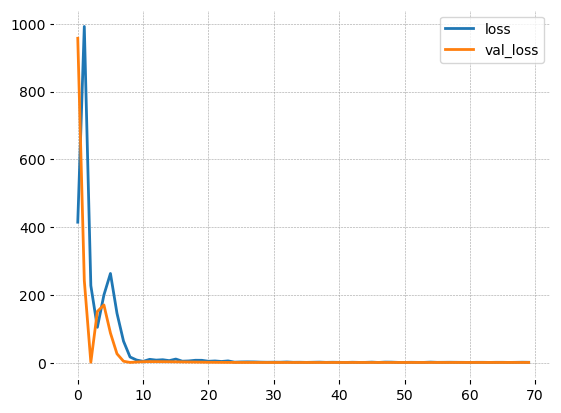

In [150]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))